In [69]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке,
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
#
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию,
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными,
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [70]:
# Данный блок в области 1 выполняется преподавателем
#
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [72]:
train = pd.read_csv('train.csv')
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.34,0.44,4.2,0.047,51.0,144.0,0.99100,3.01,0.76,12.3,6
1,6.4,0.23,0.27,2.1,0.042,35.0,100.0,0.99094,3.03,0.63,10.9,6
2,6.7,0.26,0.26,4.1,0.073,36.0,202.0,0.99560,3.30,0.67,9.5,5
3,7.4,0.30,0.32,1.7,0.030,23.0,128.0,0.99290,3.17,0.66,10.9,5
4,6.6,0.23,0.32,0.9,0.041,25.0,79.0,0.99260,3.39,0.54,10.2,7


In [73]:
train.shape

(3072, 12)

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3072 non-null   float64
 1   volatile acidity      3072 non-null   float64
 2   citric acid           3072 non-null   float64
 3   residual sugar        3072 non-null   float64
 4   chlorides             3072 non-null   float64
 5   free sulfur dioxide   3072 non-null   float64
 6   total sulfur dioxide  3072 non-null   float64
 7   density               3072 non-null   float64
 8   pH                    3072 non-null   float64
 9   sulphates             3072 non-null   float64
 10  alcohol               3072 non-null   float64
 11  quality               3072 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 288.1 KB


### Область работы 2 (выполнение лучшей модели)

In [75]:
train['quality'].value_counts().sort_index()

,count
quality,
3,14
4,119
5,912
6,1390
7,529
8,104
9,4


In [76]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000
mean,6.848210,0.279076,0.333053,6.061670,0.045817,35.249674,138.234863,0.993852,3.196136,0.490241,10.591113,5.855794
std,0.861172,0.100044,0.121301,4.896565,0.022626,17.463158,43.384731,0.002951,0.152168,0.114038,1.221263,0.889740
min,3.800000,0.080000,0.000000,0.600000,0.013000,2.000000,9.000000,0.987110,2.740000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.260000,1.700000,0.036000,23.000000,107.000000,0.991640,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.900000,0.043000,34.000000,133.000000,0.993600,3.180000,0.480000,10.400000,6.000000
75%,7.400000,0.320000,0.390000,9.100000,0.050000,46.000000,168.000000,0.995800,3.290000,0.550000,11.400000,6.000000
max,11.800000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.810000,1.080000,14.200000,9.000000


In [77]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными,
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать,
# тюниговать и т.д. модель машинного обучения

In [78]:
# Путь к тренировочному набору
path_train = 'train.csv'   # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test = 'test.csv' # содержит только имя файла, без имен папок

In [79]:
# Блок обучения модели

In [80]:
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

In [81]:
X_train = train.drop('quality', axis=1).copy()
q1_alcohol = X_train['alcohol'].quantile(0.01)
q3_alcohol = X_train['alcohol'].quantile(0.99)
X_train['alcohol'] = X_train['alcohol'].clip(q1_alcohol, q3_alcohol)

q1_sulphates = X_train['sulphates'].quantile(0.01)
q3_sulphates = X_train['sulphates'].quantile(0.99)
X_train['sulphates'] = X_train['sulphates'].clip(q1_sulphates, q3_sulphates)

q1_volatile = X_train['volatile acidity'].quantile(0.01)
q3_volatile = X_train['volatile acidity'].quantile(0.99)
X_train['volatile acidity'] = X_train['volatile acidity'].clip(q1_volatile, q3_volatile)

X_train['alcohol_to_density_ratio'] = X_train['alcohol'] / X_train['density']
X_train['total_acidity'] = X_train['fixed acidity'] + X_train['volatile acidity'] + X_train['citric acid']
X_train['free_total_so2_ratio'] = X_train['free sulfur dioxide'] / X_train['total sulfur dioxide']

X_train['sulphates_to_alcohol_ratio'] = X_train['sulphates'] / X_train['alcohol']
X_train['sugar_to_acidity_ratio'] = X_train['residual sugar'] / X_train['total_acidity']
X_train['pH_alcohol_interaction'] = X_train['pH'] * X_train['alcohol']

X_train['alcohol_squared'] = X_train['alcohol'] ** 2
X_train['sulphates_squared'] = X_train['sulphates'] ** 2
X_train['alcohol_sulphates'] = X_train['alcohol'] * X_train['sulphates']
X_train['acidity_ratio'] = X_train['fixed acidity'] / (X_train['volatile acidity'] + 0.01)
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,alcohol_to_density_ratio,total_acidity,free_total_so2_ratio,sulphates_to_alcohol_ratio,sugar_to_acidity_ratio,pH_alcohol_interaction,alcohol_squared,sulphates_squared,alcohol_sulphates,acidity_ratio
0,7.2,0.34,0.44,4.2,0.047,51.0,144.0,0.99100,3.01,0.76,...,12.411705,7.98,0.354167,0.061789,0.526316,37.023,151.29,0.5776,9.348,20.571429
1,6.4,0.23,0.27,2.1,0.042,35.0,100.0,0.99094,3.03,0.63,...,10.999657,6.90,0.350000,0.057798,0.304348,33.027,118.81,0.3969,6.867,26.666667
2,6.7,0.26,0.26,4.1,0.073,36.0,202.0,0.99560,3.30,0.67,...,9.541985,7.22,0.178218,0.070526,0.567867,31.350,90.25,0.4489,6.365,24.814815
3,7.4,0.30,0.32,1.7,0.030,23.0,128.0,0.99290,3.17,0.66,...,10.977943,8.02,0.179688,0.060550,0.211970,34.553,118.81,0.4356,7.194,23.870968
4,6.6,0.23,0.32,0.9,0.041,25.0,79.0,0.99260,3.39,0.54,...,10.276043,7.15,0.316456,0.052941,0.125874,34.578,104.04,0.2916,5.508,27.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,7.3,0.13,0.32,14.4,0.051,34.0,109.0,0.99740,3.20,0.35,...,9.223982,7.75,0.311927,0.038043,1.858065,29.440,84.64,0.1225,3.220,52.142857
3068,5.2,0.50,0.18,2.0,0.036,23.0,129.0,0.98949,3.36,0.77,...,13.542330,5.88,0.178295,0.057463,0.340136,45.024,179.56,0.5929,10.318,10.196078
3069,7.4,0.25,0.49,1.1,0.042,35.0,156.0,0.99170,3.13,0.55,...,11.394575,8.14,0.224359,0.048673,0.135135,35.369,127.69,0.3025,6.215,28.461538
3070,6.0,0.34,0.32,3.8,0.044,13.0,116.0,0.99108,3.39,0.44,...,11.906203,6.66,0.112069,0.037288,0.570571,40.002,139.24,0.1936,5.192,17.142857


In [82]:
y_train = (train['quality'] >= 6).astype(int)
y_train

,quality
0,1
1,1
2,0
3,0
4,1
...,...
3067,1
3068,1
3069,0
3070,1


In [83]:
X_test = test.copy()
X_test['alcohol'] = X_test['alcohol'].clip(q1_alcohol, q3_alcohol)
X_test['sulphates'] = X_test['sulphates'].clip(q1_sulphates, q3_sulphates)
X_test['volatile acidity'] = X_test['volatile acidity'].clip(q1_volatile, q3_volatile)

X_test['alcohol_to_density_ratio'] = X_test['alcohol'] / X_test['density']
X_test['total_acidity'] = X_test['fixed acidity'] + X_test['volatile acidity'] + X_test['citric acid']
X_test['free_total_so2_ratio'] = X_test['free sulfur dioxide'] / X_test['total sulfur dioxide']
X_test['sulphates_to_alcohol_ratio'] = X_test['sulphates'] / X_test['alcohol']
X_test['sugar_to_acidity_ratio'] = X_test['residual sugar'] / X_test['total_acidity']
X_test['pH_alcohol_interaction'] = X_test['pH'] * X_test['alcohol']

X_test['alcohol_squared'] = X_test['alcohol'] ** 2
X_test['sulphates_squared'] = X_test['sulphates'] ** 2
X_test['alcohol_sulphates'] = X_test['alcohol'] * X_test['sulphates']
X_test['acidity_ratio'] = X_test['fixed acidity'] / (X_test['volatile acidity'] + 0.01)

In [84]:
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler

pipe_final = Pipeline([
    ('scaler', RobustScaler()),  # Лучше работает с выбросами
    ('classifier', SVC(
        C=15,               # Увеличиваем параметр регуляризации
        kernel='rbf',
        gamma=0.1,          # Установим конкретное значение
        class_weight={0: 1.5, 1: 1},  # Придаем больше веса отрицательному классу
        probability=True,
        random_state=42
    ))
])
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('classifier',
                 SVC(C=15, class_weight={0: 1.5, 1: 1}, gamma=0.1,
                     probability=True, random_state=42))])

In [85]:
# Блок предсказания с использованием тестового набора

In [86]:
y_train_pred = pipe_final.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy

0.90234375

In [87]:
cv_scores = cross_val_score(pipe_final, X_train, y_train, cv=5, scoring='accuracy')
cv_scores.mean()

0.757491062207039

In [88]:
y_predict = pipe_final.predict(X_test)
y_predict

array([0, 0, 0, ..., 1, 0, 0])

<Figure size 800x600 with 0 Axes>

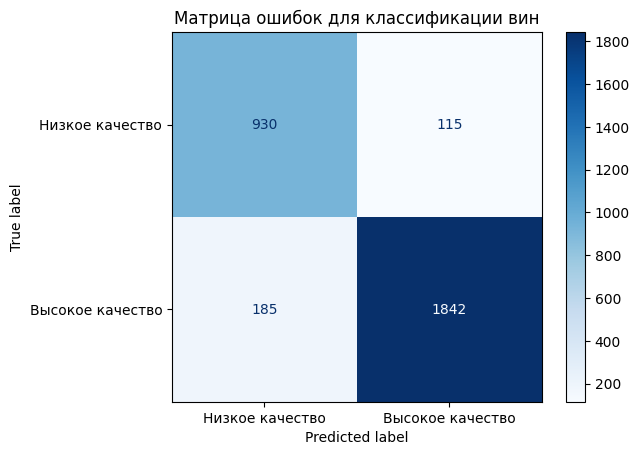

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_train_pred = pipe_final.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Низкое качество', 'Высокое качество'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Матрица ошибок для классификации вин')
plt.show()

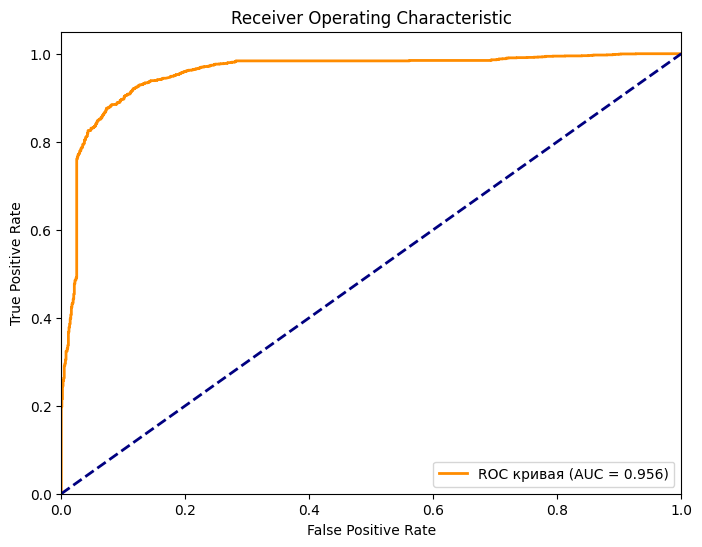

In [93]:
from sklearn.metrics import roc_curve, auc
if hasattr(pipe_final, 'predict_proba'):
    y_scores = pipe_final.predict_proba(X_train)[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC кривая (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()